# Exploring Streamlit
### A modern approach to building interactive data applications
- **Name:** Hermon Tasissa
- **Date:** April 21, 2023
- **Course Number:** CSC 295(002)


Streamlit is an open-source Python library that simplifies the process of creating and sharing beautiful, custom web apps for data anlaytics, machine learning demos and more. In just few lines of code, you can build and deploy powerful data apps, with no front-end experience required.

**Creation Date:** August 2019  
**Current Version:** As of April 21, the latest version is 1.33.0.

**Similar Packages:** Dash, Flask, Bokeh. Streamlit differentiates itself by focusing heavily on simplicity and speed of development, ideal for rapid prototyping of data applications.

**Dependencies:** Typically requires Pandas for data manipulation, NumPy for numerical operations, and Matplotlib/Plotly for plotting.

**Environment Requirements:** Streamlit runs on Python 3.6 and later, and is OS agnostic.

### Want see how it's done?
###### We can't directly run Streamlit in Jupyter Notebook so I've included images with code snippets.
[Click here to view the web app](https://orange-vis.streamlit.app/)
Import necesary packages
```python
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
```

Now we want to load the data from a CSV file and display it in a table.
We don't want to display all the data, so we can create a sidebar to let users select which trees to view. The app will then display the selected trees in a table.
```python
# Load data, set the first column as the start of the index, and store it in a variable called data
data = pd.read_csv('Orange.csv', index_col=0)
st.title('Orange Tree Growth Visualization') # Set the title of the app

# Create a sidebar with a selection box for the tree. The side bar method returns a list of selected trees. 
# It takes three arguments: the title of the sidebar, the list of options, and the default value. 
# We set the default value to the first tree in the dataset.
trees = st.sidebar.multiselect('Select a Tree:', data['Tree'].unique(), default=data['Tree'].unique()[0])

# Check if the selected trees are in the dataset and filter the data accordingly. 
# We use the isin method to filter the data based on the selected trees.
filtered_data = data[data['Tree'].isin(trees)]
st.subheader('Orange Data Table') #  Create a subheader
# Display the filtered data in a table extracting only the columns 'Tree', 'age', and 'circumference' using the write method.
st.write(filtered_data[['Tree', 'age', 'circumference']])
```
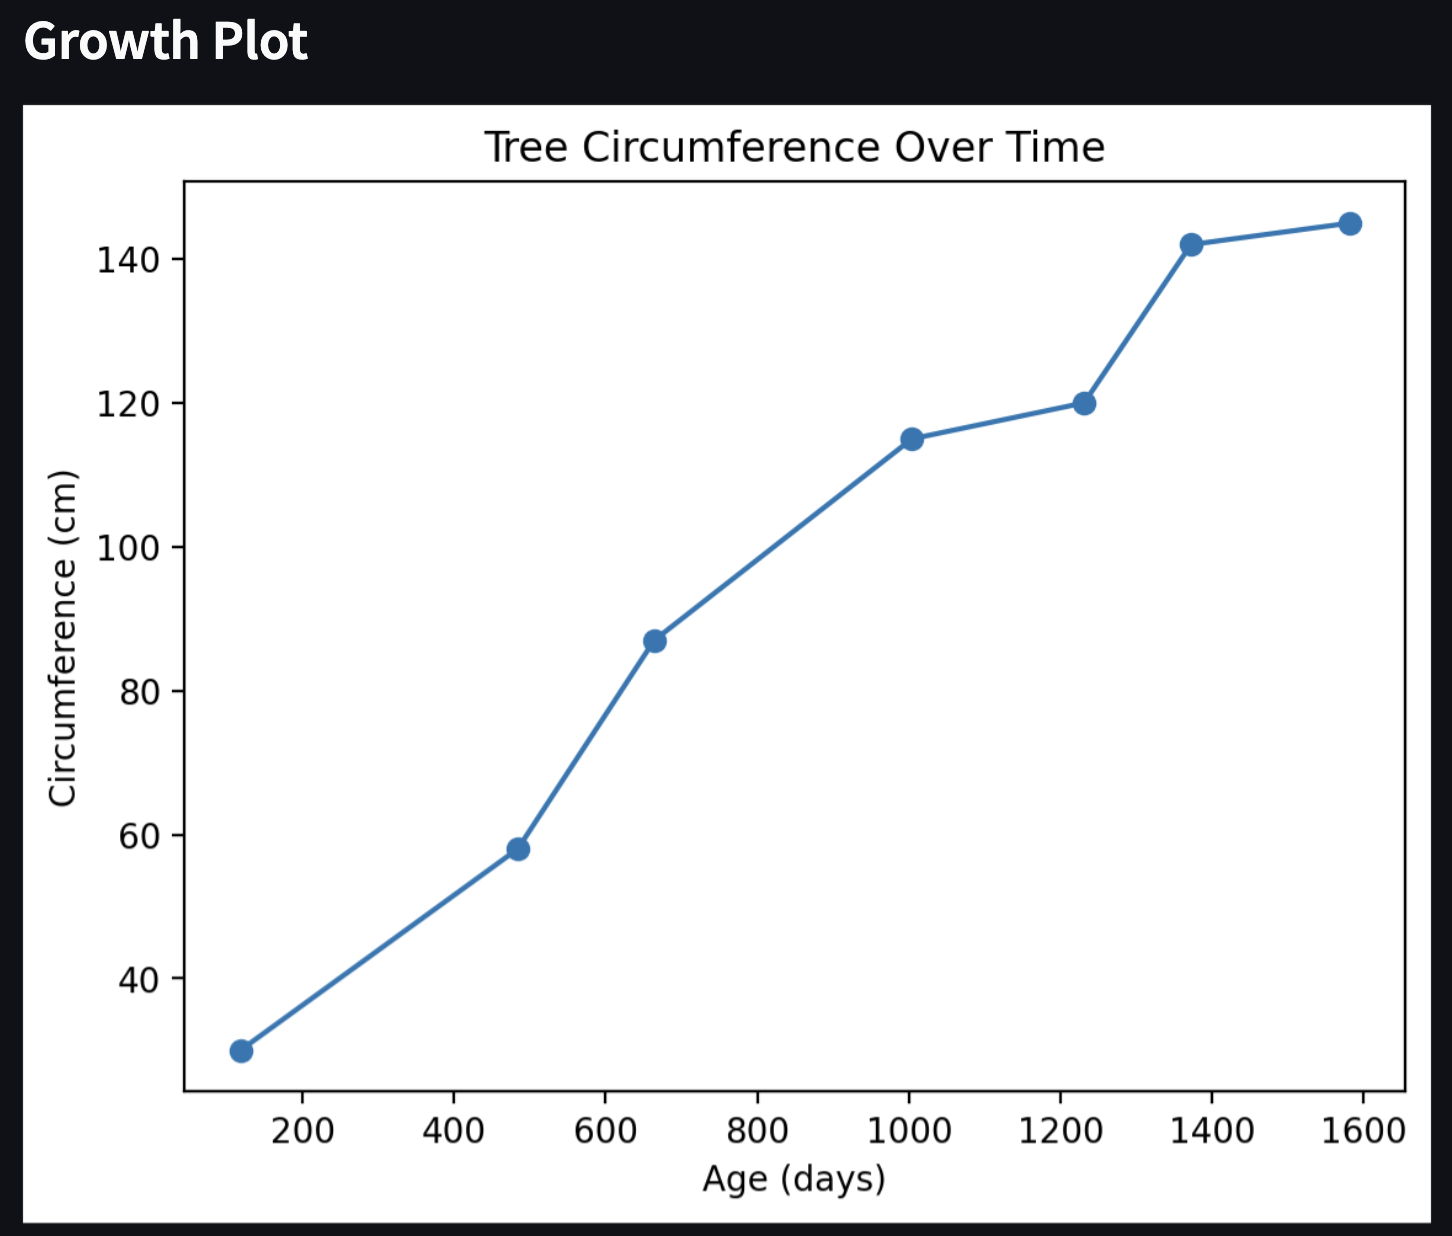

Next, we'd like to visualize the growth of the selected trees over time. We can do this by plotting the circumference of the trees against their age.
```python
# Shows the growth of selected trees overtime, represented by changes in circumference as the tree ages.
st.subheader('Growth Plot') #  Create a subheader
figure, axes = plt.subplots() # Create a figure, and axes to plot data, annotate the plot, and set labels and titles.
axes.plot(filtered_data['age'], filtered_data['circumference'], marker='o') # Plot the data using the plot method, setting the x-axis to 'age' and the y-axis to 'circumference'. We also set the marker style to 'o' to display a circular marker(dot).
axes.set_xlabel('Age (days)') # Set the x-axis label to 'Age (days)', the y-axis label to 'Circumference (cm)', and the title to 'Tree Circumference Over Time'.
axes.set_ylabel('Circumference (cm)')
axes.set_title('Tree Circumference Over Time')
st.pyplot(figure) # Display  the plot
```
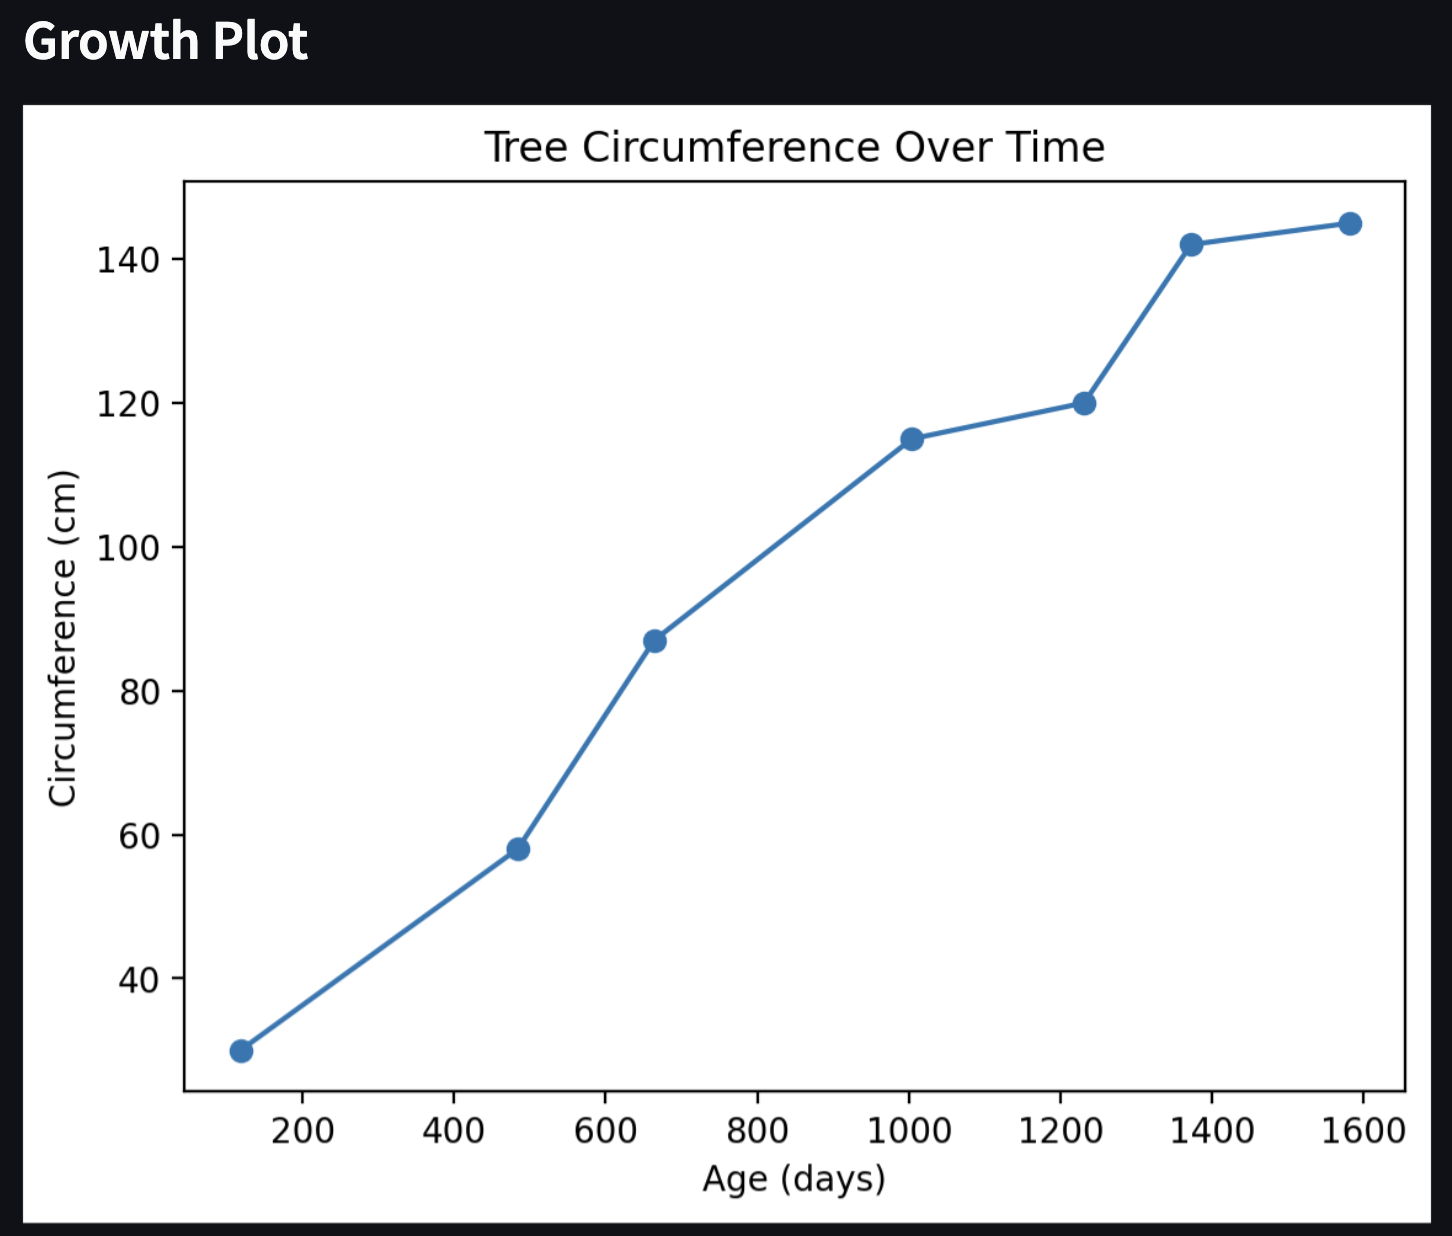


Next, we'd like to display the distribution of tree circumferences as a histogram to understand the frequency distribution of measurements.

```python
st.subheader('Circumference Distribution')  # Create a subheader
figure3, axes3 = plt.subplots() # Create a figure, and axes to plot data, annotate the plot, and set labels and titles.
axes3.hist(filtered_data['circumference'], bins=20, color='blue', alpha=0.7)  # Create a histogram on the axes. The 'circumference' data is grouped into 20 bins for granularity, colored blue with partial transparency (alpha=0.7).
axes3.set_title('Histogram of Circumferences')  # Set the title of the histogram to 'Histogram of Circumferences' to clearly identify the graph's purpose.
axes3.set_xlabel('Circumference (cm)')  # Label the x-axis 'Circumference (cm)' to indicate the data dimension being analyzed.
axes3.set_ylabel('Frequency')  # Label the y-axis 'Frequency' to show how often certain circumference measurements occur.
st.pyplot(figure3)  # Display the histogram
```
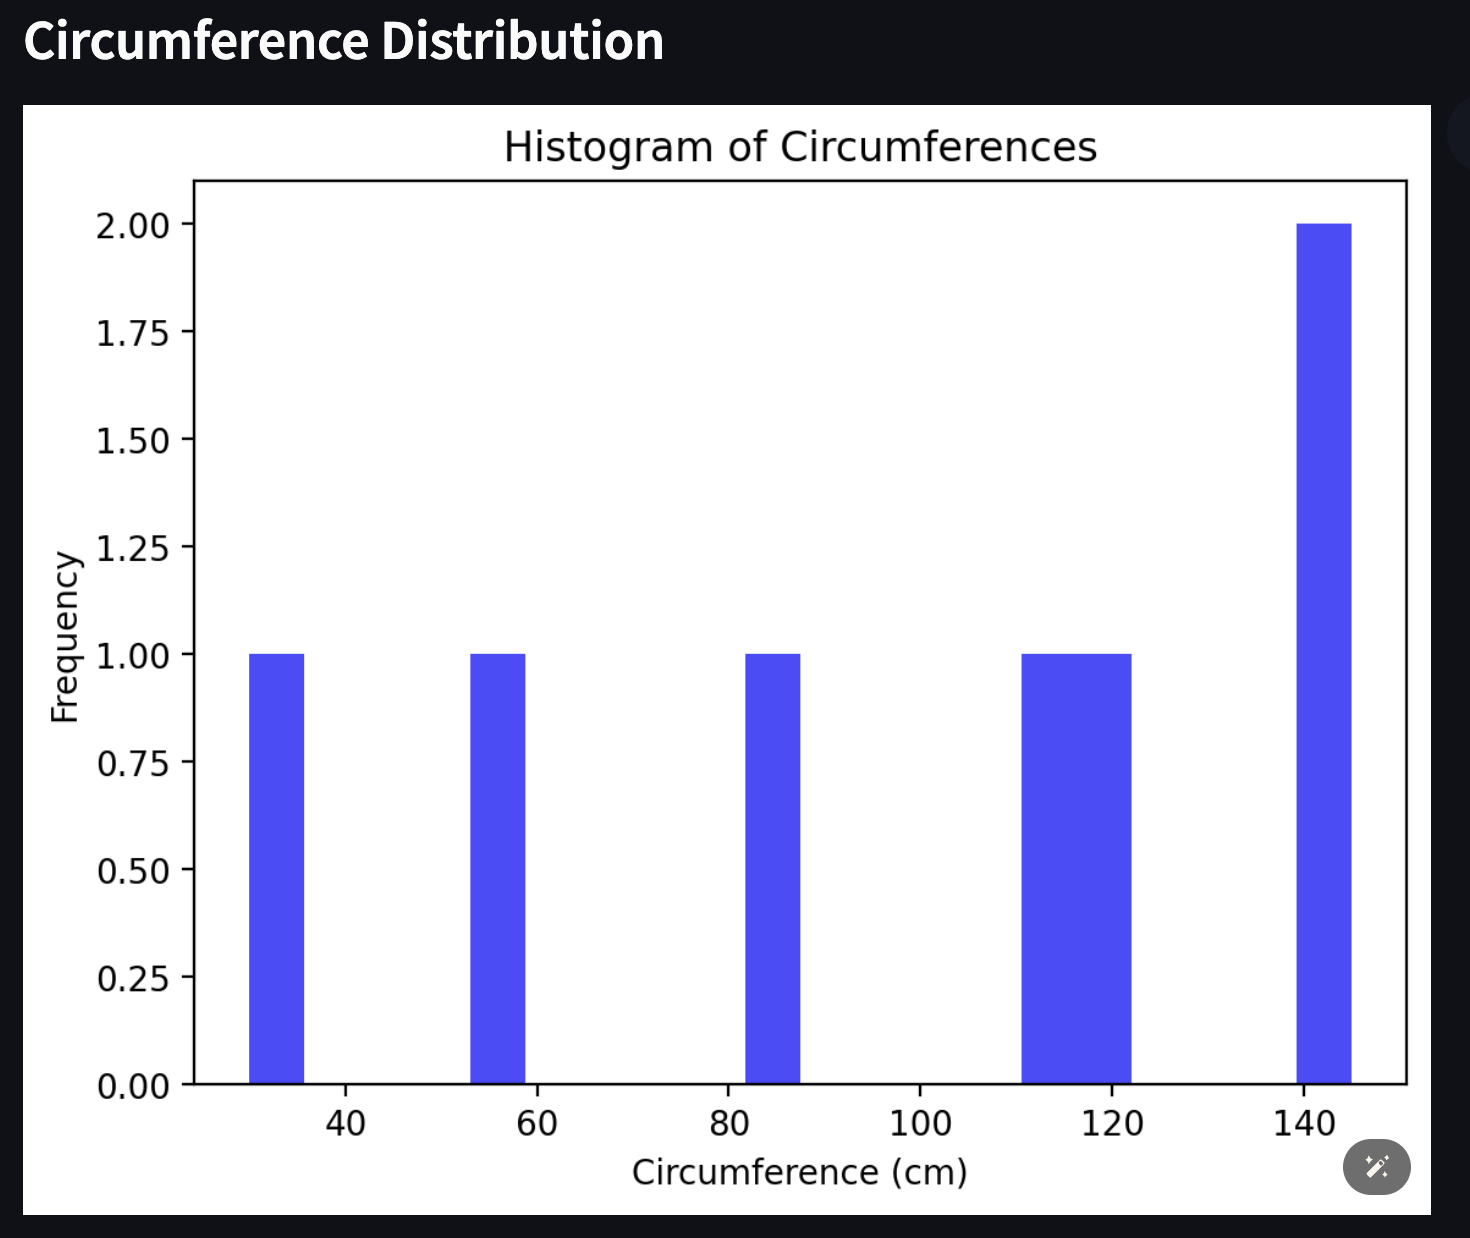


Next, We'd like to compare the growth of different trees over time by plotting the circumference of each tree against its age.

```python
st.subheader('Compare and See Growth of Trees Over Time')
figure4, axes4 = plt.subplots()
for t in trees: # Iterate through each tree type selected by the user. The loop allows us to plot multiple lines on the same graph, one for each tree type.
    subset = data[data['Tree'] == t]
    axes4.plot(subset['age'], subset['circumference'], marker='', label=f'Tree {t}')
axes4.set_title('Comparative Growth of Trees')
axes4.set_xlabel('Age (days)')
axes4.set_ylabel('Circumference (cm)')
axes4.legend() # Add a legend to the plot
st.pyplot(figure4)
```
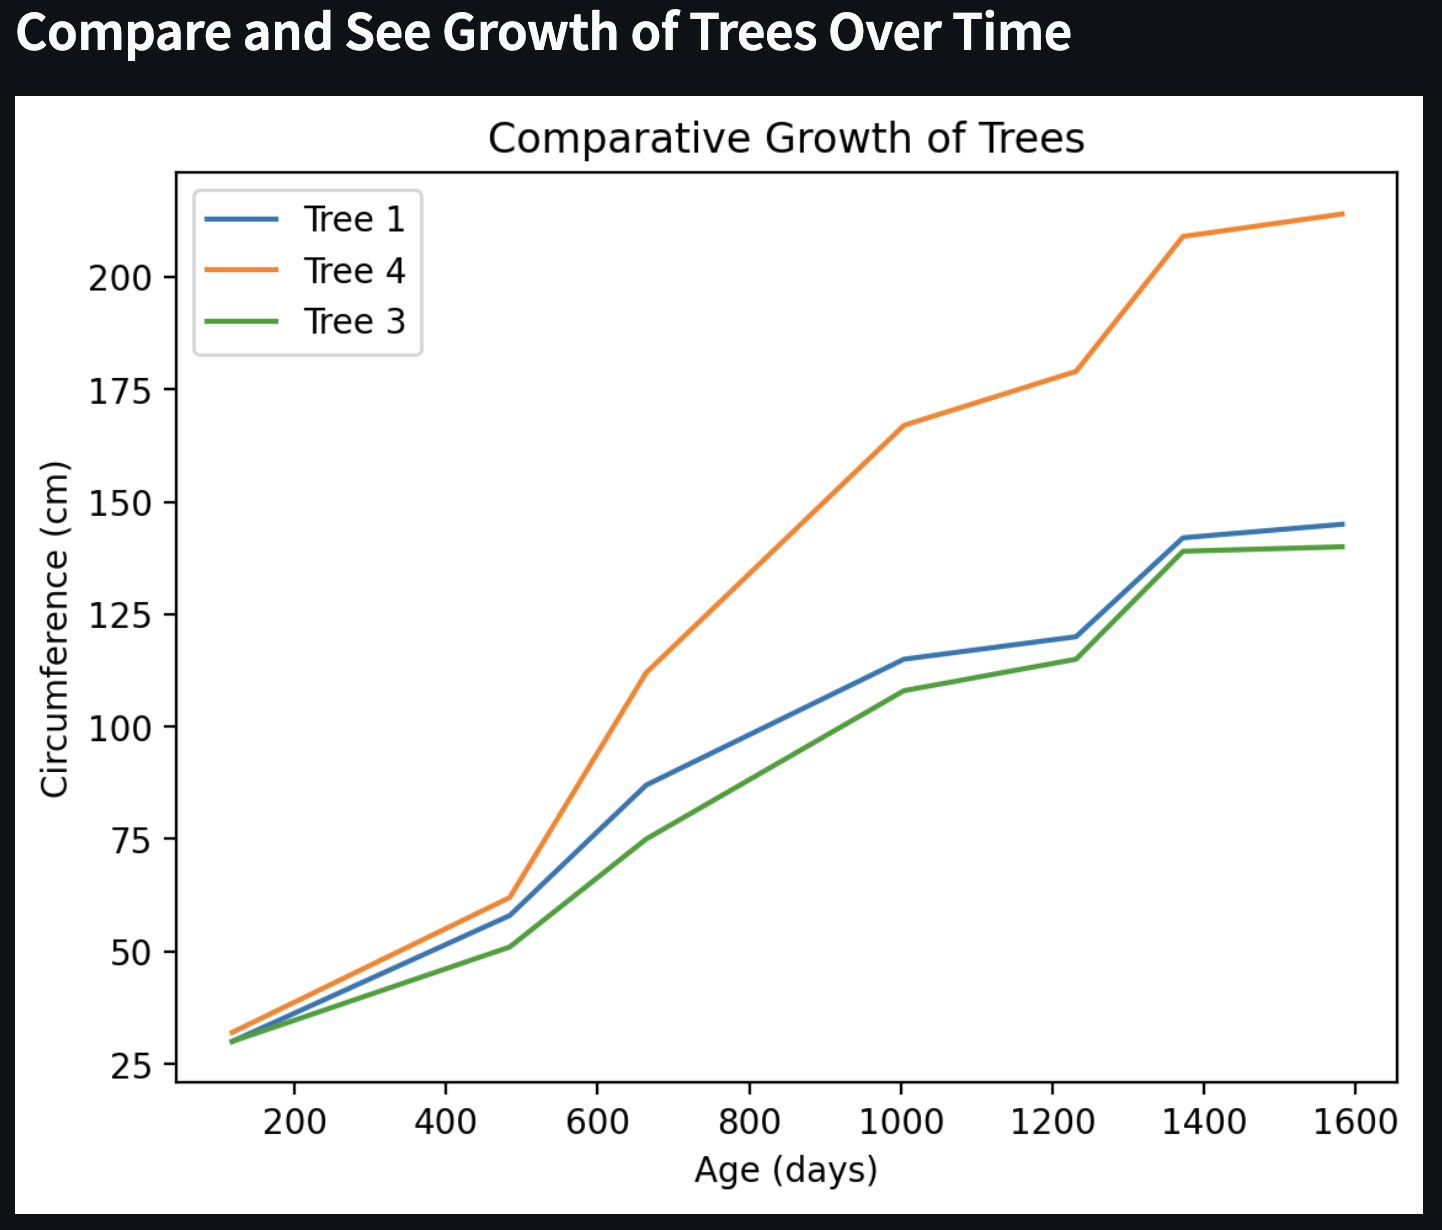

Next, we'd like to see the statistical summary of the data, including the mean, median, and standard deviation of the circumference of the selected trees.

```python
# Shows the statistical summary of the filtered data, including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
st.subheader('Statistical Summary')
st.write(filtered_data[['age', 'circumference']].describe()) # generate descriptive statistics including count, mean, std, min, 25%, 50%, 75%, and max using the describe method.
growth_rate = filtered_data['circumference'].diff() / filtered_data['age'].diff() # Calculate how quickly the circumference of each tree is changing with age by taking the difference of 'circumference' divided by the difference in 'age'.
filtered_data['Growth Rate'] = growth_rate.fillna(0) # Fill any missing values resulting from the differential calculation with 0 to avoid errors.
```
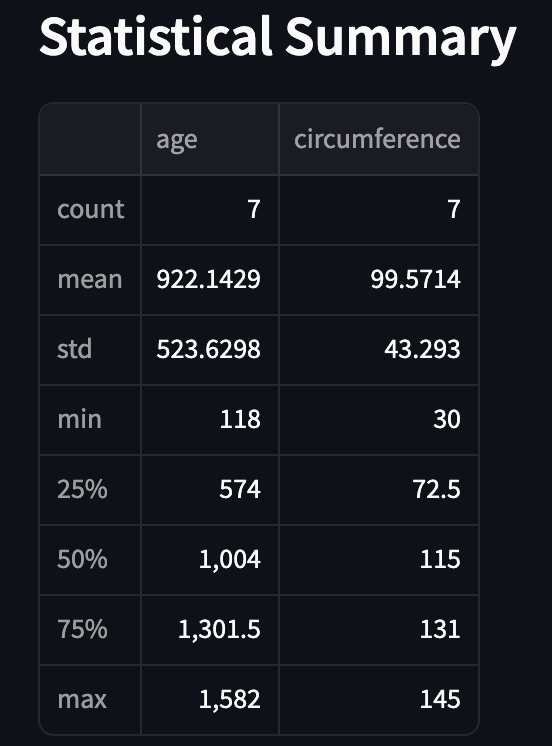

Next, we'd like to visualize the growth rate of the selected trees over time.
```python
# Growth Rate Over Time
st.subheader('Growth Rate Over Time') # 'Growth Rate' against 'age'
figure2, axes2 = plt.subplots()
axes2.plot(filtered_data['age'], filtered_data['Growth Rate'], marker='o', linestyle='--', color='r') # Use a red line with dashes and 'o' markers
axes2.set_xlabel('Age (days)')
axes2.set_ylabel('Growth Rate (cm/day)')
axes2.set_title('Growth Rate Over Time')
st.pyplot(figure2)
```
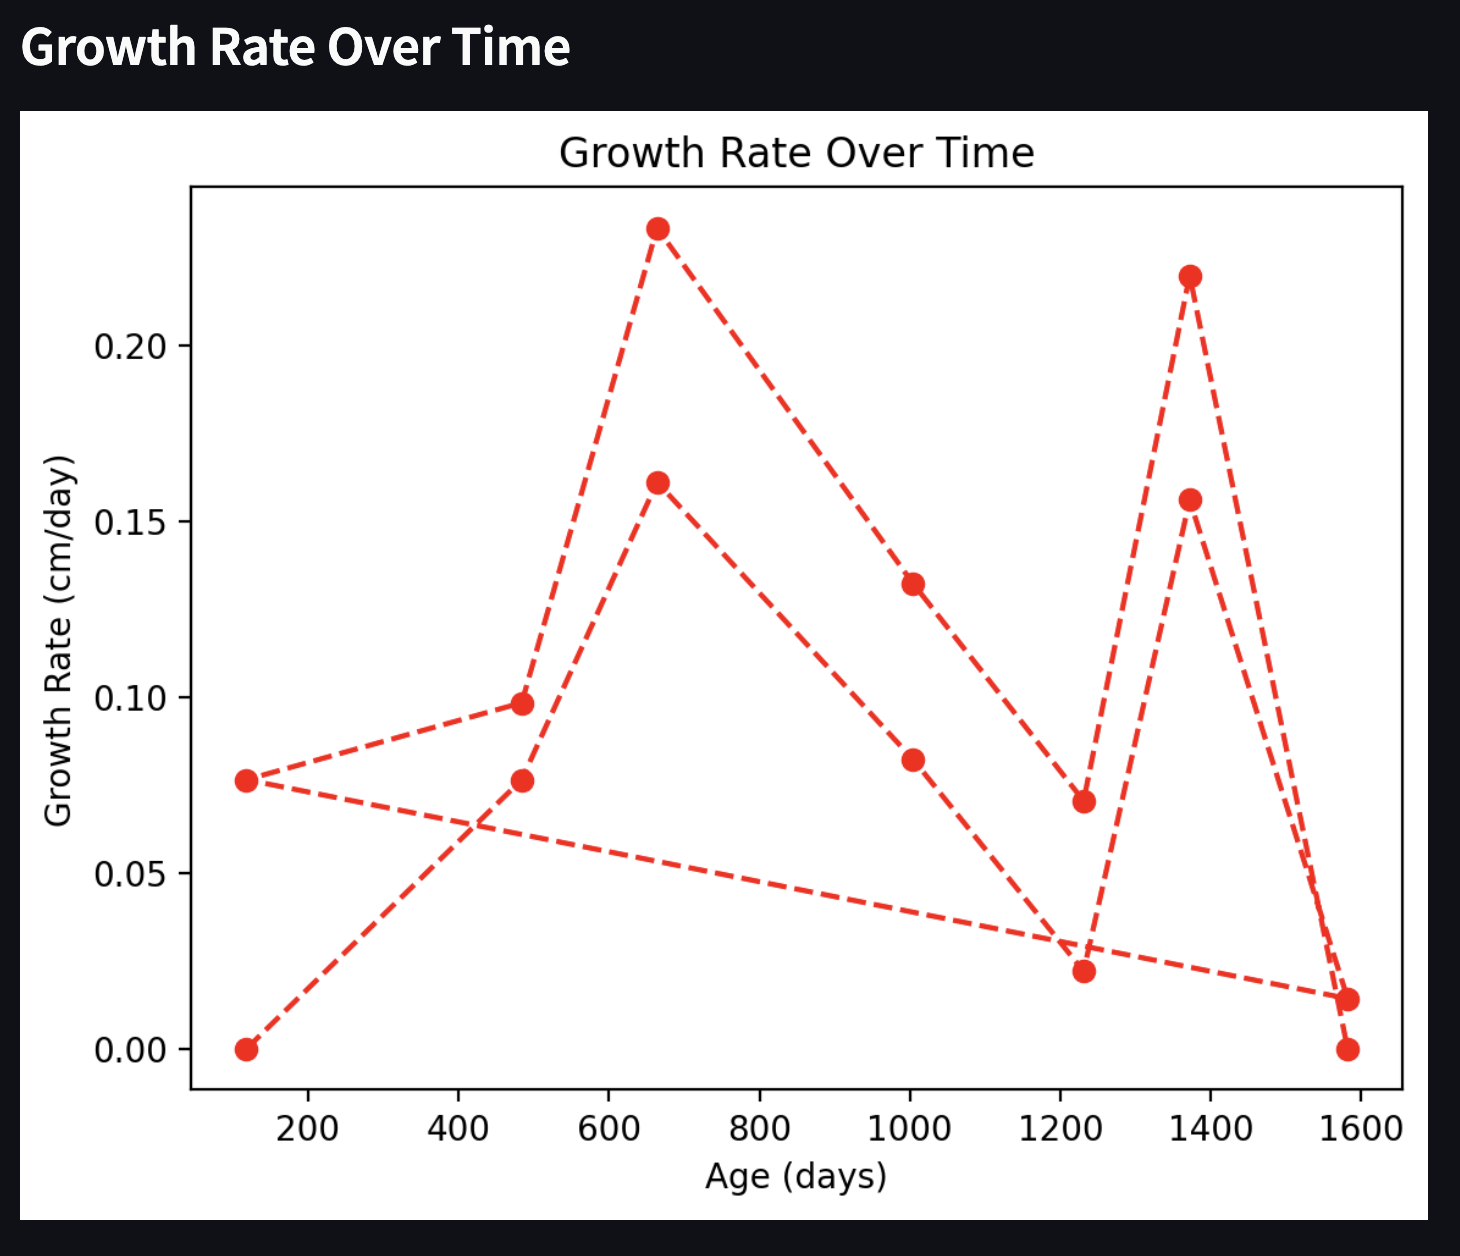

Finally, we'd like to allow users to query the circumference of the trees that are less than or equal to a certain age.

```python
st.subheader('Tree Growth By Age')
age_query = st.slider('Select age to query selected trees that are less than or equal to:', int(data['age'].min()), int(data['age'].max())) # users can select any age within the dataset's range to query the circumference of the trees at that age.
queried_data = filtered_data[filtered_data['age'] <= age_query] # Filter the data to include only rows where the 'age' column value is less than or equal to the age selected by the user through the slider.
st.write(queried_data[['Tree', 'age', 'circumference']]) # Display the queried data in a table
```
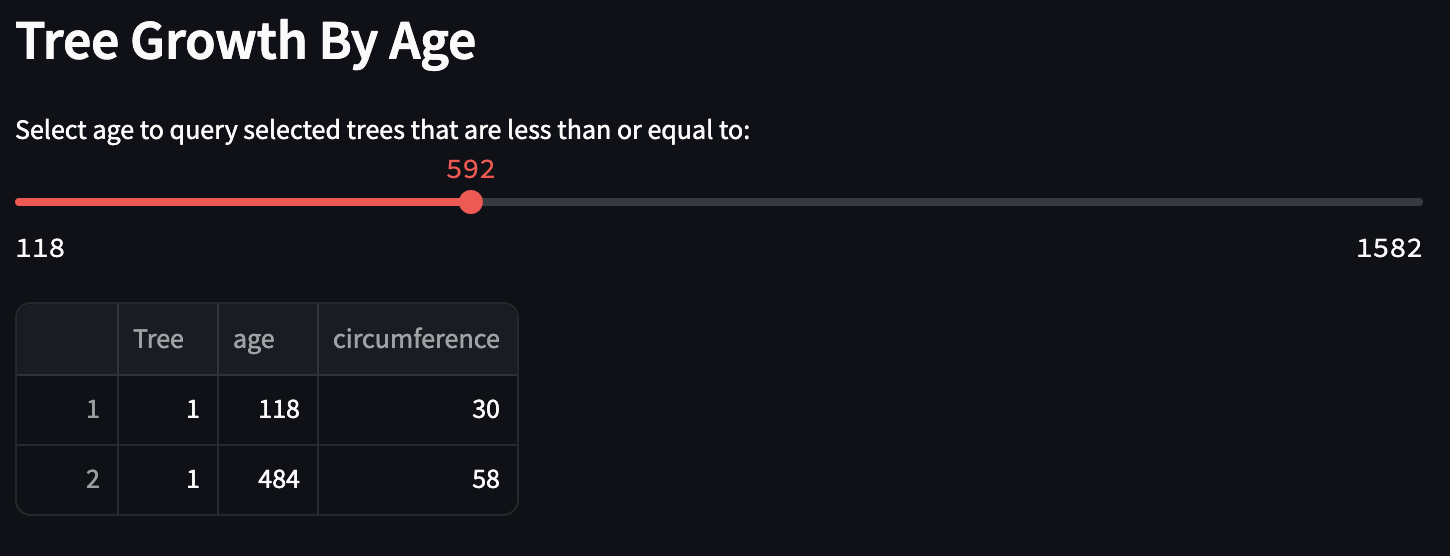
### Advantages
- Easy to learn
- No HTML, CSS, or JavaScript required
- Highly interactive
- No deployment required
- Real-time changes(automatic updates)
- Great for data visualization

### Disadvantages
- Limited customization
- Not suitable for complex applications
- Scalability can be an issue for very large applications.

### Documentation
- Clear examples
- Active community forums and support


### References
- [Streamlit Documentation](https://docs.streamlit.io)
- [Data Camp](https://www.datacamp.com/tutorial/streamlit)
- [Geeks for Geeks](https://www.geeksforgeeks.org/a-beginners-guide-to-streamlit/)
- [ChatGPT](https://chat.openai.com) - used this for understanding how a certain method works in Streamlit and for making certain calculations such as Growth Rate.
- [LinkedIn](https://www.linkedin.com/pulse/streamlit-pro-vs-cons-wendel-lopes/) - for pros and cons of Streamlit
